In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("bank-additional-full.csv", delimiter = ";")

features = ["age","job","marital","education","default","housing","loan","contact",
            "month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx",
            "cons.conf.idx","euribor3m","nr.employed"
]


outcomes= ["y"]

[[  56.    1.  999. ...,    0.    1.    0.]
 [  57.    1.  999. ...,    0.    1.    0.]
 [  37.    1.  999. ...,    0.    1.    0.]
 ..., 
 [  56.    2.  999. ...,    0.    1.    0.]
 [  44.    1.  999. ...,    0.    1.    0.]
 [  74.    3.  999. ...,    1.    0.    0.]] [[0]
 [0]
 [0]
 ..., 
 [0]
 [1]
 [0]]


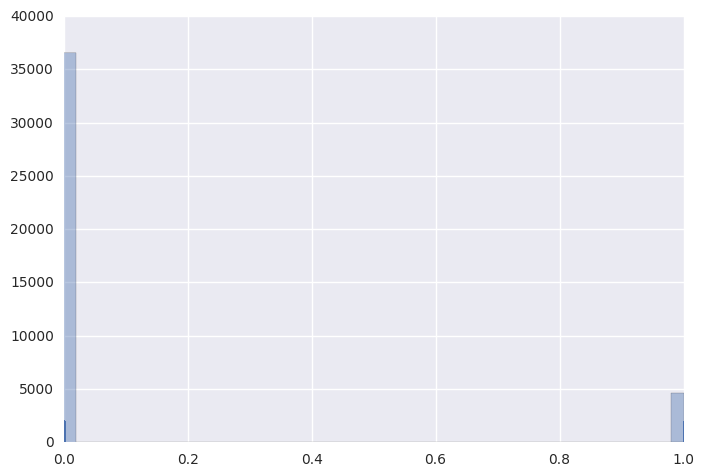

In [3]:
df_dummies = pd.get_dummies(df.copy()[features])
df_dummies_y =pd.get_dummies(df.copy()[outcomes])
del df_dummies["duration"]
del df_dummies_y["y_no"]





X_df = df_dummies

y_df = df_dummies_y
X = X_df.values
y =y_df.values

print X,y
sns_plot = sns.distplot(y, kde=False, rug =True)




In [4]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)

clf.fit(X,y)
print acc(y,clf.predict(X))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.899023987569


[ 2 61  8  7  4 60  6 49 50 43 42 52  3  5 59 33 34 53 14 44 17 10  0 51 47
 46 55 48 27 23  1 45 22  9 31 32 16 57 56 20 15 18 30 25 11 58 54 26 37 21
 38 28 39 41 40 12 36 13 19 24 29 35]
Feature ranking:
1. pdays (0.195925)
2. poutcome_success (0.127478)
3. nr.employed (0.110615)
4. euribor3m (0.107013)
5. emp.var.rate (0.073828)
6. poutcome_nonexistent (0.068997)
7. cons.conf.idx (0.053110)
8. month_mar (0.031890)
9. month_may (0.029832)
10. contact_telephone (0.026775)
11. contact_cellular (0.026134)
12. month_oct (0.022221)
13. previous (0.019742)
14. cons.price.idx (0.017832)
15. poutcome_failure (0.013561)
16. default_no (0.012175)
17. default_unknown (0.007792)
18. month_sep (0.007696)
19. job_retired (0.006723)
20. month_apr (0.005829)
21. job_student (0.005268)
22. job_blue-collar (0.004650)
23. age (0.004635)
24. month_nov (0.003961)
25. month_jul (0.003024)
26. month_dec (0.002365)
27. day_of_week_mon (0.001786)
28. month_jun (0.001479)
29. education_basic.9y (0.001030)
30

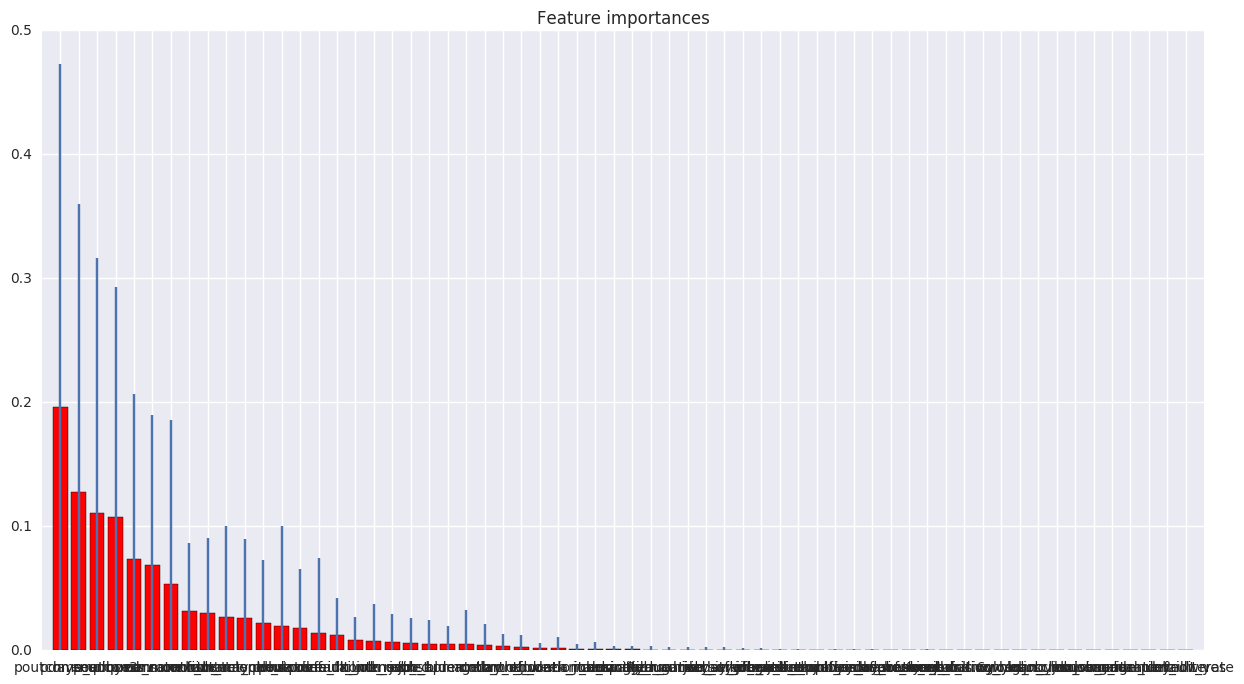

In [5]:
features = df_dummies.columns
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print indices
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')